In [ ]:
!ls

sample_data


In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [2]:
# Load train.csv
train_data = pd.read_csv('train.csv')

# Load test.csv
test_data = pd.read_csv('test.csv')


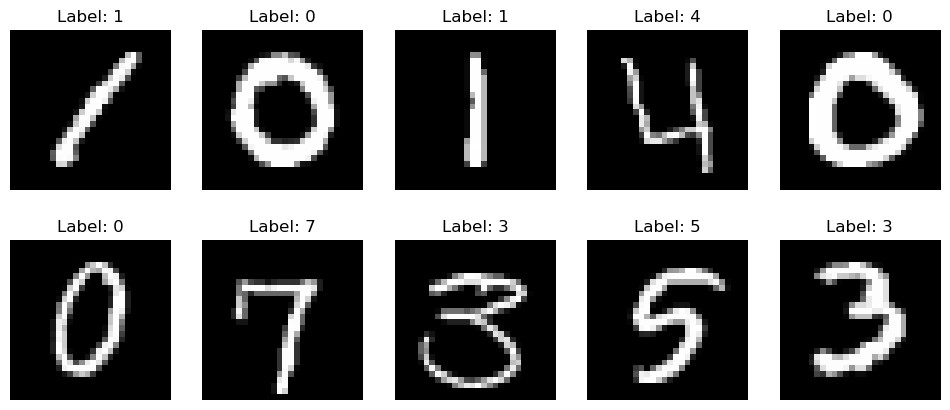

In [3]:


# Extraire les 10 premières images de l'ensemble d'entraînement
images = train_data.iloc[:10, 1:].values
labels = train_data.iloc[:10, 0].values

# Afficher les images
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

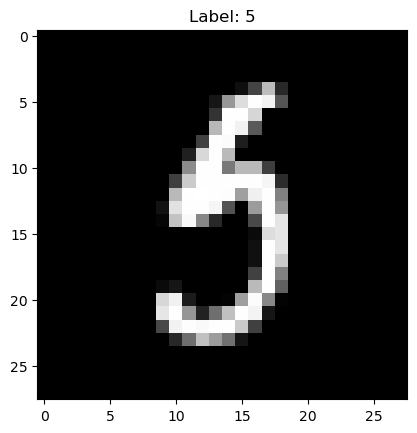

In [4]:
# 1. a. Afficher une image quelconque

random_index = np.random.randint(0, len(train_data))

label = train_data.loc[random_index, 'label']
image_pixels = train_data.loc[random_index, 'pixel0':'pixel783'].values.reshape(28, 28)

plt.figure()
plt.imshow(image_pixels, cmap='gray')
plt.title(f"Label: {label}")
plt.show()

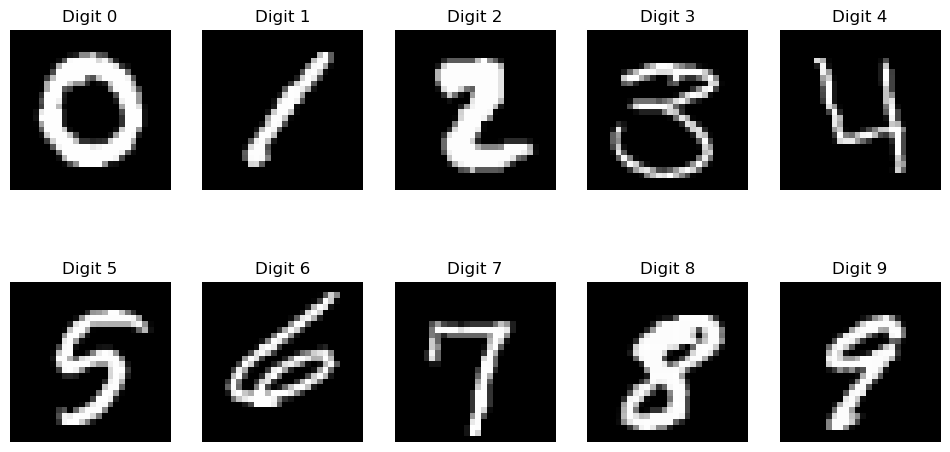

In [5]:
# 1.b. Afficher dans une même figure les chiffres de 0 à 9

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i in range(10):
    ax = axes[i // 5, i % 5]
    digit = train_data[train_data['label'] == i].iloc[0, 1:].values  # Extract the pixel values
    ax.imshow(digit.reshape(28, 28), cmap='gray')  # Reshape to (28, 28) and show as grayscale
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()

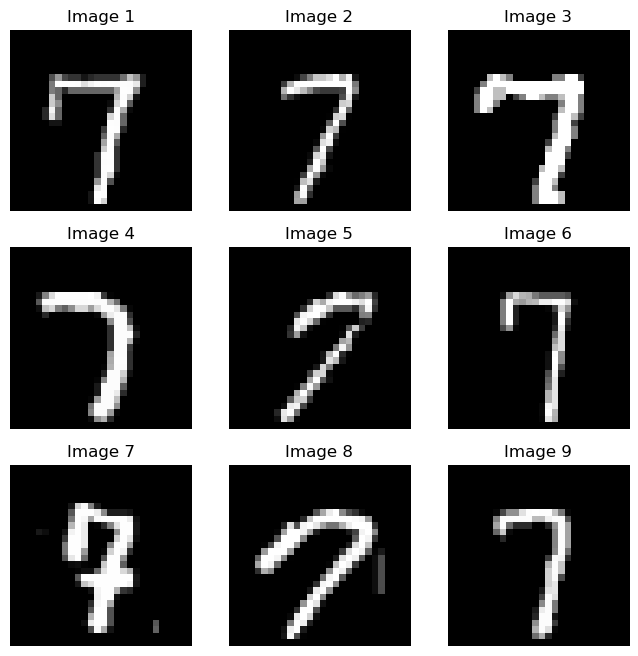

In [6]:
# 1 c visualiser les différentes façons d'écrire un 7

digit_sevens = train_data[train_data['label'] == 7].iloc[:9, 1:].values
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i in range(9):
    ax = axes[i // 3, i % 3]
    ax.imshow(digit_sevens[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Image {i + 1}")
    ax.axis('off')
plt.show()

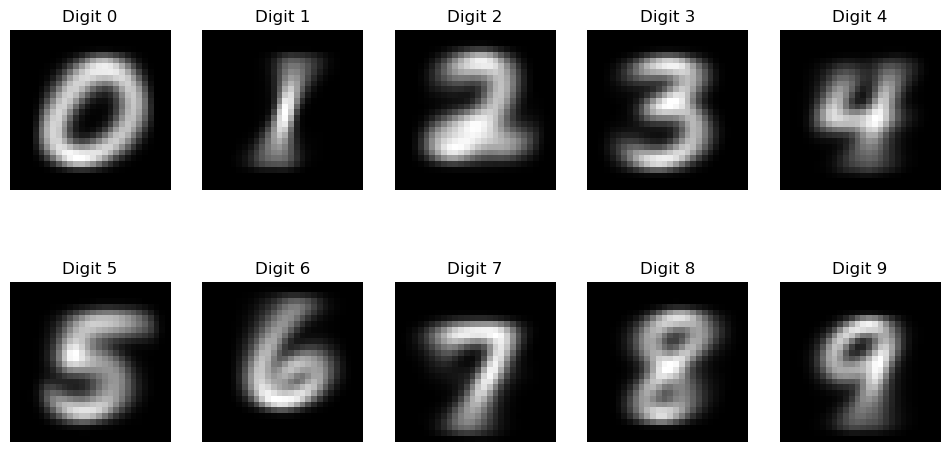

In [7]:
# d. Afficher le représentant "moyen" de chaque chiffre

average_digits = [np.mean(train_data[train_data['label'] == i].iloc[:, 1:].values, axis=0) for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(average_digits[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Digit {i}")
    ax.axis('off')

plt.show()

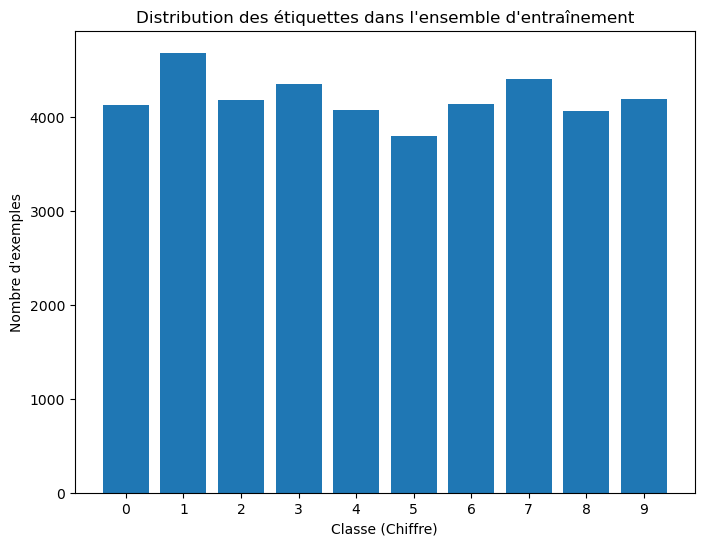

In [8]:
# Compter le nombre d'exemples par classe
label_counts = train_data['label'].value_counts()

# Tracer l'histogramme
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Classe (Chiffre)')
plt.ylabel('Nombre d\'exemples')
plt.title('Distribution des étiquettes dans l\'ensemble d\'entraînement')
plt.xticks(np.arange(10))
plt.show()

Normalisation des données

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data.iloc[:, 1:] = scaler.fit_transform(train_data.iloc[:, 1:])
test_data = scaler.transform(test_data)


C:\Users\timoc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Decision Tree

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X, y = mnist.data, mnist.target

# Split the data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_split, y_train_split)

# Predict labels for the test set
y_pred = decision_tree.predict(X_test_split)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_split, y_pred)
print(f"Accuracy du Decision Tree : {accuracy:.2f}")


C:\Users\timoc\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy du Decision Tree : 0.87


Random Forest avec un random seed de 42 :

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Créez et entraînez le modèle Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_split, y_train_split)

# Prédisez les étiquettes pour l'ensemble de test
y_pred_rf = random_forest.predict(X_test_split)

# Évaluez la performance du modèle Random Forest
accuracy_rf = accuracy_score(y_test_split, y_pred_rf)
print(f"Accuracy du Random Forest : {accuracy_rf:.2f}")

Accuracy du Random Forest : 0.97


deep learning feedforward neural network (FNN)

Epoch 1/10
420/420 - 3s - loss: 0.4736 - accuracy: 0.8621 - val_loss: 0.2491 - val_accuracy: 0.9312 - 3s/epoch - 8ms/step
Epoch 2/10
420/420 - 8s - loss: 0.2324 - accuracy: 0.9319 - val_loss: 0.1867 - val_accuracy: 0.9510 - 8s/epoch - 18ms/step
Epoch 3/10
420/420 - 3s - loss: 0.1761 - accuracy: 0.9483 - val_loss: 0.1566 - val_accuracy: 0.9561 - 3s/epoch - 6ms/step
Epoch 4/10
420/420 - 2s - loss: 0.1424 - accuracy: 0.9593 - val_loss: 0.1381 - val_accuracy: 0.9624 - 2s/epoch - 5ms/step
Epoch 5/10
420/420 - 2s - loss: 0.1203 - accuracy: 0.9641 - val_loss: 0.1240 - val_accuracy: 0.9655 - 2s/epoch - 4ms/step
Epoch 6/10
420/420 - 2s - loss: 0.1023 - accuracy: 0.9688 - val_loss: 0.1198 - val_accuracy: 0.9659 - 2s/epoch - 4ms/step
Epoch 7/10
420/420 - 2s - loss: 0.0885 - accuracy: 0.9737 - val_loss: 0.1160 - val_accuracy: 0.9679 - 2s/epoch - 4ms/step
Epoch 8/10
420/420 - 2s - loss: 0.0792 - accuracy: 0.9763 - val_loss: 0.1144 - val_accuracy: 0.9690 - 2s/epoch - 4ms/step
Epoch 9/10
420/420 - 2s

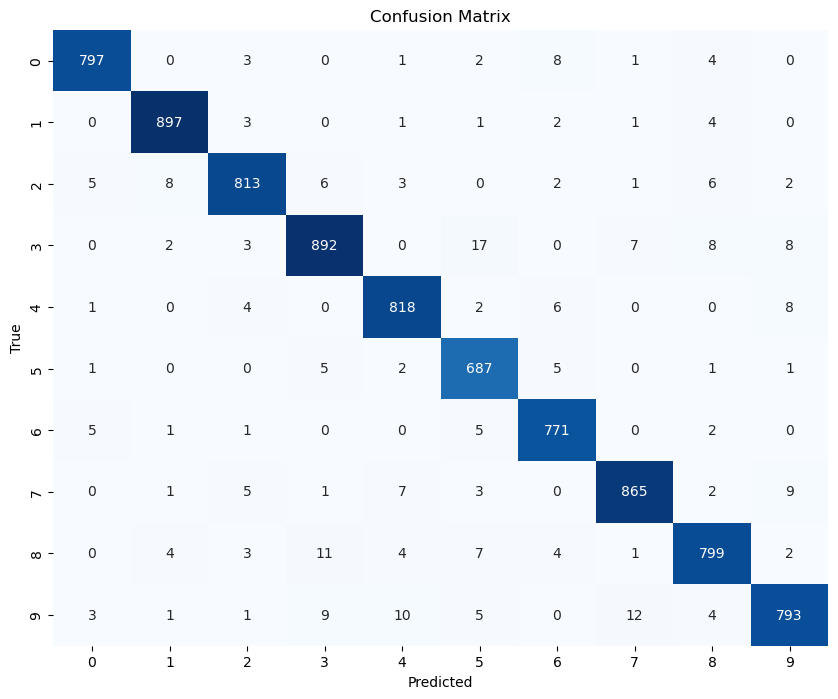

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras

# Load train.csv
train_data = pd.read_csv('train.csv')

# Load test.csv
test_data = pd.read_csv('test.csv')

# Extract the features (X) and labels (y) from train_data
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28, 28).astype(np.float32) / 255.0

# Create a simple neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the performance of the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Accuracy of the Deep Learning model: {test_acc:.2f}")

# Make predictions on the test set
predicted_labels = model.predict(X_test)

# Prepare true labels for the test set
true_labels = y_test

# Create the confusion matrix
cm = confusion_matrix(true_labels, np.argmax(predicted_labels, axis=1))

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Deep learning CNN architecture

In [25]:

# Extract the features (X) and labels (y) from train_data
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0

# Define a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Create a learning rate scheduler callback
lr_callback = keras.callbacks.LearningRateScheduler(lr_scheduler)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with learning rate scheduling
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2, callbacks=[lr_callback])

# Evaluate the performance of the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Accuracy of the CNN model with learning rate scheduling: {test_acc:.2f}")

Epoch 1/15
420/420 [==============================] - 13s 30ms/step - loss: 0.2889 - accuracy: 0.9109 - val_loss: 0.0914 - val_accuracy: 0.9714 - lr: 0.0010
Epoch 2/15
420/420 [==============================] - 12s 29ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.0671 - val_accuracy: 0.9789 - lr: 0.0010
Epoch 3/15
420/420 [==============================] - 13s 30ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0567 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 4/15
420/420 [==============================] - 12s 30ms/step - loss: 0.0407 - accuracy: 0.9863 - val_loss: 0.0532 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 5/15
420/420 [==============================] - 12s 29ms/step - loss: 0.0343 - accuracy: 0.9888 - val_loss: 0.0466 - val_accuracy: 0.9871 - lr: 0.0010
Epoch 6/15
420/420 [==============================] - 12s 29ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0501 - val_accuracy: 0.9875 - lr: 9.0484e-04
Epoch 7/15
420/420 [==============================] - 

In [26]:
# Save the trained model to an HDF5 file
model.save("mnist_cnn_model.h5")


C:\Users\timoc\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


263/263 [==============================] - 1s 5ms/step


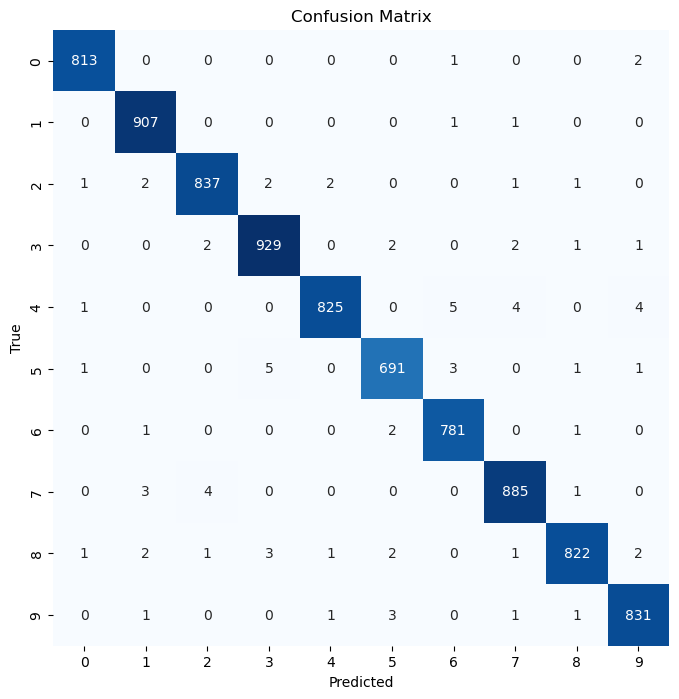

In [34]:
# Faites des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convertir les probabilités en étiquettes de classe

# Assurez-vous que les ensembles y_test et y_pred ont la même longueur
if len(y_test) != len(y_pred):
    raise ValueError("Inconsistent numbers of samples between y_test and y_pred")

# Créez la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichez la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



Epoch 1/15
420/420 [==============================] - 13s 32ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0536 - val_accuracy: 0.9890 - lr: 3.6788e-04
Epoch 2/15
420/420 [==============================] - 13s 31ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0631 - val_accuracy: 0.9874 - lr: 3.6788e-04
Epoch 3/15
420/420 [==============================] - 13s 31ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0643 - val_accuracy: 0.9871 - lr: 3.6788e-04
Epoch 4/15
420/420 [==============================] - 13s 31ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0629 - val_accuracy: 0.9879 - lr: 3.6788e-04
Epoch 5/15
420/420 [==============================] - 13s 31ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0554 - val_accuracy: 0.9890 - lr: 3.6788e-04
Epoch 6/15
420/420 [==============================] - 13s 30ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0583 - val_accuracy: 0.9890 - lr: 3.3287e-04
Epoch 7/15
420/420 [==============

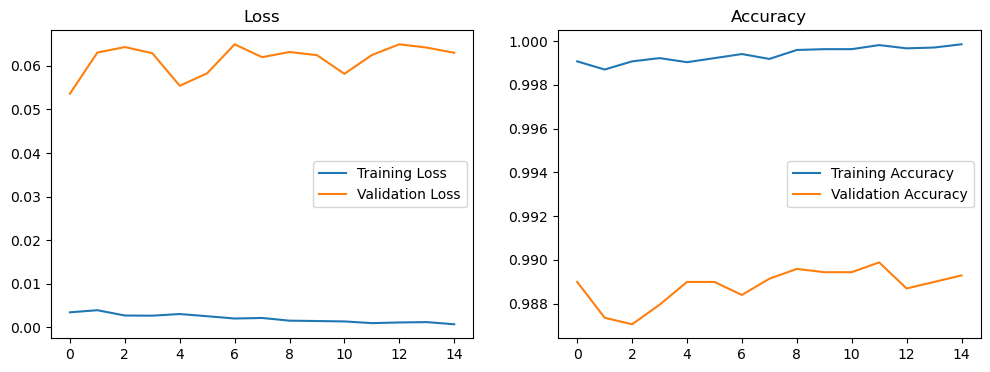

In [35]:
# Train the model with learning rate scheduling
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2, callbacks=[lr_callback])

# Evaluate the performance of the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Accuracy of the CNN model with learning rate scheduling: {test_acc:.2f}")

# Plot training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
